<a href="https://colab.research.google.com/github/SaveWork/test_for_work/blob/master/blip_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pwd

'/content'

In [6]:
ls

BLIP/  sample_data/


In [7]:
%cd BLIP

/content/BLIP


In [16]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_path,image_size,device):
    if image_path.startswith('http'):
      raw_image = Image.open(requests.get(image_path, stream=True).raw).convert('RGB')
    else:
      raw_image = Image.open(image_path).convert('RGB')
    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

In [8]:
from models.blip import blip_decoder

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'

model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.97G/1.97G [00:18<00:00, 111MB/s]


reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a woman and her dog on the beach


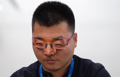

In [32]:

image_size = 480
image_path = 'https://img1.mydrivers.com/img/20210128/s_e99626ac8d8a4fca9c9b7be56b2290c1.png'
image = load_demo_image(image_path=image_path,image_size=image_size, device=device)


In [30]:

with torch.no_grad():
    # beam search
    # caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
    # nucleus sampling
    caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5)
    print('caption: '+caption[0])

caption: a person that has been made out of pink tape


In [33]:
from models.blip_vqa import blip_vqa


model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'

model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

question = 'how is the face different from normal face?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate')
    print('answer: '+answer[0])

100%|██████████| 1.35G/1.35G [00:17<00:00, 82.6MB/s]


load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: color
